In [44]:
import pandas as pd
import altair as alt
from IPython.display import display, Markdown
import missingno as msno

In [132]:
alt.renderers.enable('html')
alt.renderers.set_embed_options(embed_options={'renderer': 'canvas', 'actions': False})

RendererRegistry.enable('html')

In [69]:
df = pd.read_csv('/Users/kaitlinsinger/wa_notify/DEN_future/data_extraction/manipulated_data/simplified_wide_df_with_date_loc_imputed.csv')

state_pop = pd.read_excel('/Users/kaitlinsinger/wa_notify/DEN_future/data_extraction/additional_data/baselines/NST-EST2024-POP.xlsx')
case_counts = pd.read_csv('/Users/kaitlinsinger/wa_notify/DEN_future/data_extraction/additional_data/baselines/weekly_metrics_by_state.csv')


## Wa Notify Data Analysis

In [124]:
display(Markdown('### Data Summaries'))

### Data Summaries

In [125]:
display(Markdown('#### Article Data Sample'))
df.head()

#### Article Data Sample

,Unnamed: 0,Unnamed: 0.1,source,pm_start_date,pm_end_date,pm_location,cases_assigned_count,cases_interviewed_count,cases_interviewed_perc,cases_named_contacts_count,...,staff_hired_ci_count,staff_hired_ci_per_health_dept_mean,staff_hired_count,staff_hired_ct_count,staff_hired_ct_per_health_dept_mean,user_cases_notifying,users_with_code,region,time_period,ratio_cases_contacts_intv
0,0,0,A Multifaceted Evaluation of a COVID-19 Contac...,2021-03-01,03/31/2021,King County,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest,T3,NaN
1,1,1,A Multifaceted Evaluation of a COVID-19 Contac...,2021-04-01,06/30/2020,King County,NaN,NaN,76.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest,T4,NaN
2,2,2,A Multifaceted Evaluation of a COVID-19 Contac...,2020-07-01,06/30/2021,King County,52317.0,42900.0,82.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest,T2,NaN
3,3,3,A Multifaceted Evaluation of a COVID-19 Contac...,2020-07-01,09/30/2020,King County,NaN,NaN,87.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Northwest,T2,NaN
4,4,4,A Patient-Initiated Digital COVID-19 Contact N...,2020-05-18,08/17/2020,United States*,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,T2,NaN


In [126]:
display(Markdown('#### State Population Data Sample'))
state_pop.head()

#### State Population Data Sample

,table with row headers in column A and column headers in rows 3 through 4. (leading dots indicate sub-parts),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,Annual Estimates of the Resident Population fo...,NaN,NaN,NaN,NaN,NaN,NaN
1,Geographic Area,"April 1, 2020 Estimates Base",Population Estimate (as of July 1),NaN,NaN,NaN,NaN
2,NaN,NaN,2020,2021.0,2022.0,2023.0,2024.0
3,United States,331515736,331577720,332099760.0,334017321.0,336806231.0,340110988.0
4,Northeast,57617706,57431458,57252533.0,57159597.0,57398303.0,57832935.0


In [127]:
display(Markdown('#### Case Counts Data Sample'))
case_counts.head()

#### Case Counts Data Sample

,date_updated,state,start_date,end_date,tot_cases,new_cases,tot_deaths,new_deaths,new_historic_cases,new_historic_deaths
0,01/23/2020,AK,01/16/2020,01/22/2020,0,0,0,0,0,0
1,01/30/2020,AK,01/23/2020,01/29/2020,0,0,0,0,0,0
2,02/06/2020,AK,01/30/2020,02/05/2020,0,0,0,0,0,0
3,02/13/2020,AK,02/06/2020,02/12/2020,0,0,0,0,0,0
4,02/20/2020,AK,02/13/2020,02/19/2020,0,0,0,0,0,0


In [114]:
cols_interest = [
       'source', 
       'pm_start_date', 'pm_end_date', 'time_period',
       'pm_location', 'region', 
       'cases_assigned_count', 'cases_interviewed_count',
       'cases_interviewed_perc', 'cases_named_contacts_count',
       'cases_not_assigned_count', 
        # 'cases_per_staff_month',
       'cases_positive_from_test_mean', 'cases_positive_from_test_med',
       'cases_reached_count', 'cases_reached_from_exposure_mean',
       'cases_reached_from_positive_max', 'cases_reached_from_positive_med',
       'cases_reached_from_symptom_mean', 'cases_reached_from_symptom_med',
       'cases_reached_from_test_mean', 'cases_reached_from_test_med',
       'cases_reached_perc', 
       'percent_naming_contacts',
       # 'cases_were_contacts_count',
       'contacts_assigned_count', 'contacts_infected_count',
       'contacts_infected_perc', 'contacts_interviewed_count',
       'contacts_interviewed_perc', 'contacts_named_count',
       'contacts_named_count_household',
       'contacts_named_perc_household', 'contacts_named_ratio_mean',
       'contacts_named_ratio_mean_cases_naming',
       'contacts_named_ratio_mean_household', 'contacts_named_ratio_med',
       'contacts_per_staff_month', 'contacts_reached_count',
       'contacts_reached_from_exposure_mean',
       'contacts_reached_from_exposure_med',
       'contacts_reached_from_named_mean', 'contacts_reached_from_named_med',
       'contacts_reached_from_symptom_med', 'contacts_reached_from_test_mean',
       'contacts_reached_from_test_med', 'contacts_reached_perc',
       'contacts_tested_count', 
       #  'hd_cases_interviewed_perc_hdcount',
       # 'hd_cases_interviewed_perc_mean', 'hd_cases_interviewed_perc_med',
       # 'hd_cases_positive_from_test_mean_hdcount',
       # 'hd_cases_positive_from_test_mean_mean',
       # 'hd_cases_positive_from_test_mean_med',
       # 'hd_cases_reached_from_test_mean_hdcount',
       # 'hd_cases_reached_from_test_mean_mean',
       # 'hd_cases_reached_from_test_mean_med',
       # 'hd_cases_was_contacts_perc_hdcount', 'hd_cases_was_contacts_perc_mean',
       # 'hd_cases_was_contacts_perc_med',
       # 'hd_contacts_named_ratio_mean_cases_naming_hdcount',
       # 'hd_contacts_named_ratio_mean_cases_naming_mean',
       # 'hd_contacts_named_ratio_mean_cases_naming_med',
       # 'hd_contacts_named_ratio_mean_hdcount',
       # 'hd_contacts_named_ratio_mean_mean', 'hd_contacts_named_ratio_mean_med',
       # 'hd_contacts_reached_from_named_mean_hdcount',
       # 'hd_contacts_reached_from_named_mean_mean',
       # 'hd_contacts_reached_from_named_mean_med',
       # 'hd_contacts_reached_perc_hdcount', 'hd_contacts_reached_perc_mean',
       # 'hd_contacts_reached_perc_med',
       # 'hd_contacts_test_from_notified_hdcount',
       # 'hd_contacts_test_from_notified_mean',
       # 'hd_contacts_test_from_notified_med',
       # 'hd_percent_naming_contcts_hdcount', 'hd_percent_naming_contcts_mean',
       # 'hd_percent_naming_contcts_med', 
       'hr_hours', 'monetary_cost',
       'notifications_sent_count', 'num_users_count', 'num_users_upper_bound',
        'quarantine_adherent_perc',
       'staff_hired_ci_count', 'staff_hired_ci_per_health_dept_mean',
       'staff_hired_count', 'staff_hired_ct_count',
       'staff_hired_ct_per_health_dept_mean', 'user_cases_notifying',
       'users_with_code', 
       'ratio_cases_contacts_intv']

In [115]:
df['ratio_cases_contacts_intv'] = df['cases_interviewed_count']/df['contacts_interviewed_count']

In [116]:
# data profiling
df[cols_interest].describe()

,cases_assigned_count,cases_interviewed_count,cases_interviewed_perc,cases_named_contacts_count,cases_not_assigned_count,cases_positive_from_test_mean,cases_positive_from_test_med,cases_reached_count,cases_reached_from_exposure_mean,cases_reached_from_positive_max,...,num_users_upper_bound,quarantine_adherent_perc,staff_hired_ci_count,staff_hired_ci_per_health_dept_mean,staff_hired_count,staff_hired_ct_count,staff_hired_ct_per_health_dept_mean,user_cases_notifying,users_with_code,ratio_cases_contacts_intv
count,5.700000e+01,5.200000e+01,51.000000,4.700000e+01,6.000000,2.000000,11.000000,15.000000,4.000000,1.0,...,1.0,1.0,14.000000,14.000000,4.000000,14.00000,14.000000,2.000000,2.000000,13.000000
mean,8.424133e+05,3.862469e+05,69.288824,1.895171e+05,17199.000000,40.670000,48.000000,148739.200000,165.900000,24.0,...,3000000.0,81.0,37499.500000,714.428571,1215.500000,35464.00000,664.285714,72521.500000,261789.500000,3.604419
std,1.640675e+06,6.766037e+05,34.550558,3.219684e+05,28680.839081,38.169624,15.178933,263515.808696,7.090839,NaN,...,NaN,NaN,10845.303441,202.581689,869.038357,12265.24458,229.232978,6243.045771,261422.326752,5.958107
min,4.000000e+01,4.000000e+01,26.610000,4.000000e+01,18.000000,13.680000,24.000000,959.000000,156.000000,24.0,...,3000000.0,81.0,26288.000000,487.000000,600.000000,22292.00000,425.000000,68107.000000,76936.000000,0.561793
25%,4.987000e+03,3.400500e+03,48.375000,6.805000e+02,2777.000000,27.175000,48.000000,4839.500000,164.100000,24.0,...,3000000.0,81.0,28847.750000,562.000000,750.000000,24107.00000,458.000000,70314.250000,169362.750000,1.113771
50%,1.410600e+04,8.675500e+03,70.650000,2.890000e+03,5896.500000,40.670000,48.000000,24973.000000,167.400000,24.0,...,3000000.0,81.0,32354.500000,628.000000,881.000000,31645.00000,586.000000,72521.500000,261789.500000,1.588116
75%,9.410350e+05,5.670642e+05,82.350000,3.426345e+05,12556.750000,54.165000,48.000000,103052.500000,169.200000,24.0,...,3000000.0,81.0,45323.250000,855.000000,1346.500000,45371.25000,852.000000,74728.750000,354216.250000,1.863993
max,6.078802e+06,2.681000e+06,263.650000,1.214861e+06,74869.000000,67.660000,72.000000,840922.000000,172.800000,24.0,...,3000000.0,81.0,54651.000000,1072.000000,2500.000000,54905.00000,1077.000000,76936.000000,446643.000000,22.525481


#### Map of Available Article Data

<AxesSubplot:>

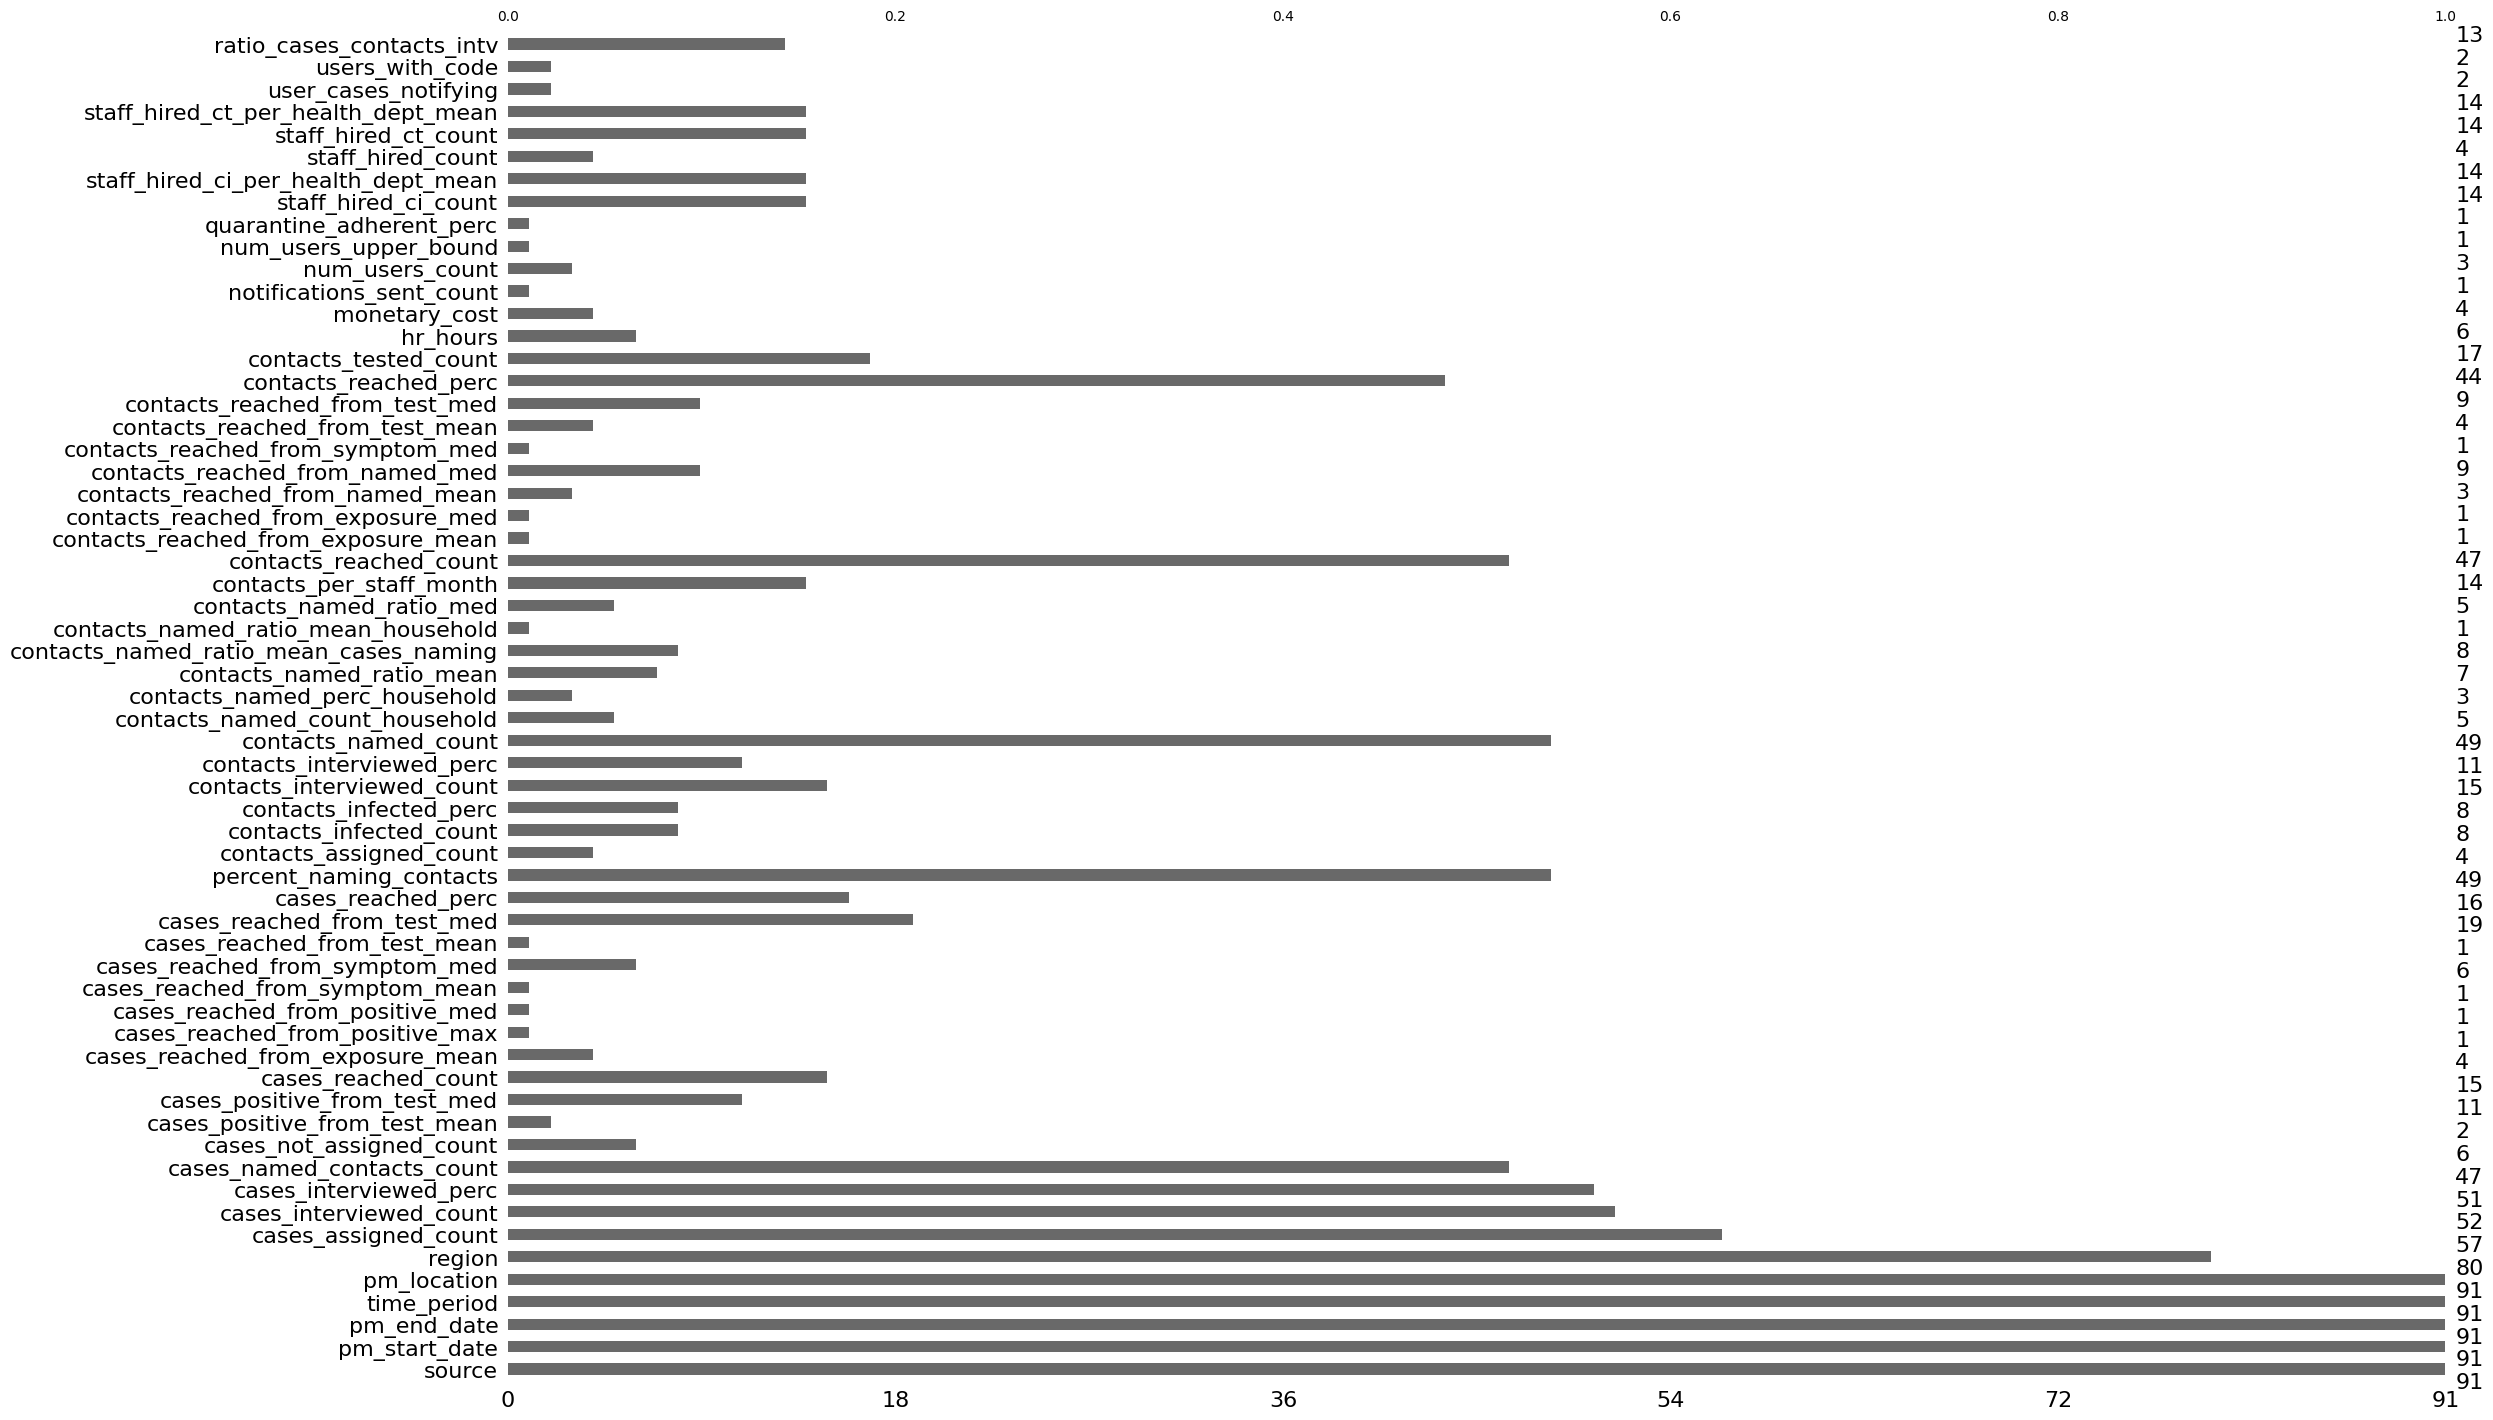

In [128]:
# missingness map
#msno.matrix(df[cols_interest], labels=True, label_rotation=90)
#plt.show()
display(Markdown('#### Map of Available Article Data'))
msno.bar(df[cols_interest])

In [130]:
display(Markdown('### Data Analysis'))

### Data Analysis

In [131]:
display(Markdown('#### Random Exploration'))

#### Random Exploration

In [56]:
alt.Chart(df).mark_tick().encode(
    alt.X('cases_assigned_count:Q')
)

alt.Chart(...)

In [57]:
alt.Chart(df).mark_point().encode(
    alt.X("cases_assigned_count:Q",  scale=alt.Scale(type='log')),
    alt.Y("source:N")
)

alt.Chart(...)

In [58]:
alt.Chart(df).mark_point().encode(
    alt.X("cases_interviewed_count:Q",  scale=alt.Scale(type='log')),
    alt.Y("source:N")
)

alt.Chart(...)

In [119]:
alt.Chart(df).mark_point().encode(
    alt.X("cases_interviewed_perc:Q"),
    alt.Y("source:N")
)

alt.Chart(...)

In [120]:
alt.Chart(df).mark_point().encode(
    alt.X("ratio_cases_contacts_intv:Q"),
    alt.Y("source:N")
)

alt.Chart(...)

In [121]:
alt.Chart(df).mark_point().encode(
    alt.X("cases_interviewed_perc:Q"),
    alt.Y("region:N")
)

alt.Chart(...)

In [62]:
alt.Chart(df).mark_point().encode(
    alt.X("time_period:O"),
    alt.Y("cases_interviewed_perc:Q"),
    alt.Size("cases_assigned_count:Q", ),
    #alt.Color("region:N"),
    tooltip = [
        alt.Tooltip("source:N"),
        alt.Tooltip("pm_start_date:T"),
        alt.Tooltip("pm_end_date:T")
   ]
).properties(
    width=500
)

alt.Chart(...)

In [63]:
alt.Chart(df).mark_bar().encode(
    alt.X("ratio_cases_contacts_intv:Q"),
    alt.Y("source:N")
)

alt.Chart(...)

In [143]:
brush = alt.selection_interval(
    encodings=['x'] # limit selection to x-axis (year) values
)

# dynamic query histogram
years = alt.Chart(df).mark_bar().add_params(
    brush
).encode(
    x=alt.X('yearmonth(pm_start_date):T', title='Sum cases assigned by start month'),
    y=alt.Y('sum(cases_assigned_count):Q', title=None)
).properties(
    width=650,
    height=50
)
chart = alt.Chart(df).mark_point().encode(
    alt.X("region:N"),
    alt.Y("cases_interviewed_perc:Q"),
    alt.Size("cases_assigned_count:Q", ),
    #alt.Color("region:N"),
    tooltip = [
        alt.Tooltip("source:N"),
        alt.Tooltip("pm_start_date:T"),
        alt.Tooltip("pm_end_date:T")
   ],
   opacity=alt.condition(brush, alt.value(0.75), alt.value(0.05))
).properties(
    width=500
)

alt.vconcat(years, chart).properties(spacing=5)

alt.VConcatChart(...)

### Plots from Doc
At a national level, plot each of the following on a monthly basis. Reporting a table with counts over a given period could also be useful: 

- The number of tests produced.  We want to get this number from “The SARS-CoV-2 test scale-up in the USA”.  Currently I can’t find these numbers in the github repository, but I am hoping these numbers can be found somewhere in their analysis scripts 
- The number of cases reported to the CDC.  This is inside of the weekly_metrics_by_state.csv.  Data should be aggregated for the national level estimates. 
- The number of cases reported in the stargel paper. 
- The number of cases interviewed (also stargel) 
- The number cases interviewed 
- The number of cases reporting contacts 
- The number of contacts reached. 

In [144]:
# The number of cases reported to the CDC. This is inside of the weekly_metrics_by_state.csv. 
# Data should be aggregated for the national level estimates.
grouped_case_counts = case_counts.groupby(by="start_date").sum().reset_index()

alt.Chart(grouped_case_counts).mark_bar().encode(
    x=alt.X('yearmonth(start_date):T', title='Sum cases by start month (all articles)'),
    y=alt.Y('sum(tot_cases):Q', title=None)
).properties(
    width=650,
    height=50
)

alt.Chart(...)

In [141]:
# The number of cases reported in the stargel paper.
# The number of cases interviewed (also stargel)
df_stargel = df[df['source'].str.startswith('Case Investigation and Contact Tracing Efforts From Health Departments')]
long_df = df_stargel.melt(
    id_vars=['pm_start_date'],
    value_vars=['cases_assigned_count', 'cases_interviewed_count'],
    var_name='case_type',
    value_name='count'
)
alt.Chart(long_df).mark_bar().encode(
    alt.X('yearmonth(pm_start_date):T', title='Sum cases by start month (stargel paper)'),
    alt.Y('sum(count):Q', title=None),
    alt.Color('case_type:N'),
    xOffset='case_type:N'
).properties(
    width=650,
    height=50
)

alt.Chart(...)

In [140]:
# The number of contacts reported in the stargel paper.
# The number of contacts reached (also stargel)
long_df = df_stargel.melt(
    id_vars=['pm_start_date'],
    value_vars=['contacts_named_count', 'contacts_reached_count'],
    var_name='case_type',
    value_name='count'
)
alt.Chart(long_df).mark_bar().encode(
    alt.X('yearmonth(pm_start_date):T', title='Sum contacts by start month (stargel paper)'),
    alt.Y('sum(count):Q', title=None),
    alt.Color('case_type:N'),
    xOffset='case_type:N'
).properties(
    width=650,
    height=50
)

alt.Chart(...)

In [139]:
# non-stargel paper
# The number cases interviewed
# The number of cases reporting contacts
# The number of contacts reached.
df_non_stargel = df[~df['source'].str.startswith('Case Investigation and Contact Tracing Efforts From Health Departments')]
long_df = df_stargel.melt(
    id_vars=['pm_start_date'],
    value_vars=['cases_interviewed_count', 'cases_named_contacts_count','contacts_reached_count'],
    var_name='case_type',
    value_name='count'
)
alt.Chart(long_df).mark_bar().encode(
    alt.X('yearmonth(pm_start_date):T', title='Sum cases by start month 2020-2021 (all other papers)'),
    alt.Y('sum(count):Q', title=None),
    alt.Color('case_type:N'),
    xOffset='case_type:N'
).properties(
    width=650,
    height=50
)

alt.Chart(...)

At the national level, it would be interesting to plot the number of reported case investigators and contact tracers across months.  Based on the under-reporting of stargel (compared to the CDC case reported) we can scale up the number of CI/CT staff for an estimate of the national level staffing.  So we would multiply the number of CI/CT staff from stargel by (# of cases reported by CDC / # of cases reported by stargel) for the given month.   

- I would be interested in this estimate plotted against time next to the number of cases reported.
- In a separate figure it would also be interesting to look at the ratio of cases reported vs case investigators.  We could do (imputed national CI staff per national level case) and (Stargel reported CI / Stargel reported cases assigned. 

For the digital side of things,  

On the state level, it would be worth looking at the NPR data which reports over the course of three months.  The Vermont paper “The public health impact of COVID-19 variants of concern on the effectiveness of contact tracing in Vermont, United States.” Also has information we could use.   

- number of staff hired per case across studies / jurisdictions and time.  There is reporting on this, but mainly from one study (And also NPR Mabe?).  
- [ ] Look into NPR reporting numbers 
- Contacts total over time across studies? 
- Cases total across time / study 
- Take the total number of reported cases and divide by the reported number of cases assigned and or the reported number of case investigators / contact tracers. We have numbers from the one report. 

- Contacts elicited per case across all studies… 
    - Both among all cases and among cases reporting contacts 
- What percent of cases are reached across locations / times / sources 
- What percent of contacts are reached across locations / times / sources 
- Proportion of reported contacts that are known.\ 
- Percent of cases that report any number of contacts 
- Include KC results. 

In [145]:
df['contacts_named_ratio_computed'] = df['contacts_named_count']/df['cases_interviewed_count']
alt.Chart(df).mark_bar().encode(
    alt.X('yearmonth(pm_start_date):T', title='Sum cases by start month 2020-2021 (all other papers)'),
    alt.Y('average(contacts_named_ratio_computed):Q', title=None),
).properties(
    width=650,
    height=50
)

alt.Chart(...)

In [148]:
display(df[['contacts_named_count','cases_interviewed_count','contacts_named_ratio_computed','contacts_named_ratio_mean','contacts_named_ratio_med']])

,contacts_named_count,cases_interviewed_count,contacts_named_ratio_computed,contacts_named_ratio_mean,contacts_named_ratio_med
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,NaN,42900.0,NaN,1.8,NaN
3,NaN,NaN,NaN,NaN,NaN
4,1957.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...
86,NaN,NaN,NaN,NaN,NaN
87,NaN,NaN,NaN,NaN,NaN
88,NaN,NaN,NaN,NaN,NaN
89,NaN,8473.0,NaN,NaN,NaN
